<a href="https://colab.research.google.com/github/aditya452/PROJECT/blob/main/Implementation_of_deep_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt

In [2]:
# Loading training and test data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Formatting input data layer
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

X_train /= 255
X_test /= 255 # Normalize

In [4]:
# One hot encoding
nb_classes = 10
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

In [5]:
# Build model
model = Sequential()

In [6]:
# Input
model.add(Flatten(input_shape = (28, 28)))
# Hidden layer 1
model.add(Dense(units = 128, activation = "sigmoid"))
# Hidden layer 2
model.add(Dense(units = 128, activation = "sigmoid"))
# Hidden layer 3
model.add(Dense(units = 128, activation = "sigmoid"))
# Hidden layer 4
model.add(Dense(units = 128, activation = "sigmoid"))
# Output layer
model.add(Dense(units = 10, activation = "softmax"))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 151,306
Trainable params: 151,306
Non-trai

In [8]:
# Compile model
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [9]:
history = model.fit(X_train, y_train,
                    epochs = 100,
                    batch_size = 128,
                    verbose = 1,
                    validation_split = 0.1)

Epoch 1/100
422/422 [==============================] - 4s 7ms/step - loss: 1.0394 - accuracy: 0.6784 - val_loss: 0.3416 - val_accuracy: 0.9082
Epoch 2/100
422/422 [==============================] - 3s 6ms/step - loss: 0.2918 - accuracy: 0.9180 - val_loss: 0.1964 - val_accuracy: 0.9483
Epoch 3/100
422/422 [==============================] - 3s 6ms/step - loss: 0.2016 - accuracy: 0.9430 - val_loss: 0.1561 - val_accuracy: 0.9553
Epoch 4/100
422/422 [==============================] - 3s 8ms/step - loss: 0.1591 - accuracy: 0.9534 - val_loss: 0.1287 - val_accuracy: 0.9628
Epoch 5/100
422/422 [==============================] - 2s 6ms/step - loss: 0.1274 - accuracy: 0.9632 - val_loss: 0.1150 - val_accuracy: 0.9680
Epoch 6/100
422/422 [==============================] - 2s 6ms/step - loss: 0.1058 - accuracy: 0.9692 - val_loss: 0.1058 - val_accuracy: 0.9708
Epoch 7/100
422/422 [==============================] - 3s 6ms/step - loss: 0.0890 - accuracy: 0.9744 - val_loss: 0.1001 - val_accuracy: 0.9712

313/313 [==============================] - 1s 3ms/step


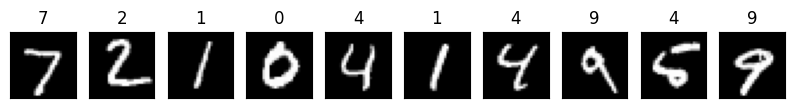

In [10]:
preds = model.predict(X_test)
preds = np.argmax(preds, axis = 1)
     
fig, ax = plt.subplots(ncols = 10, sharex = False,
                       sharey = True, figsize = (10, 10))
for i in range(10):
    ax[i].set_title(preds[i])
    ax[i].imshow(X_test[i], cmap='gray')
    ax[i].get_xaxis().set_visible(False)
    ax[i].get_yaxis().set_visible(False)
plt.show()

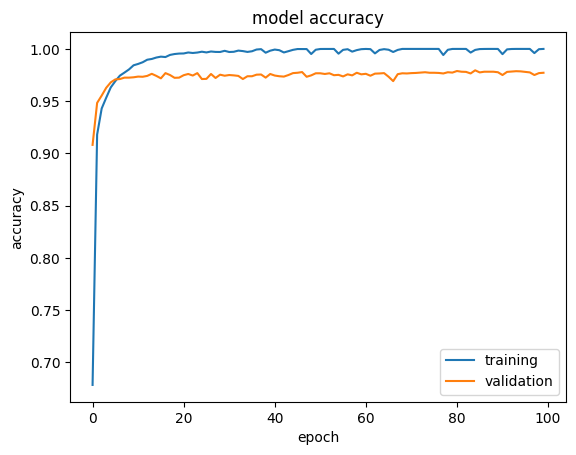

In [11]:
# accuracy vs epochs
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["training", "validation"], loc = "best")
plt.show();

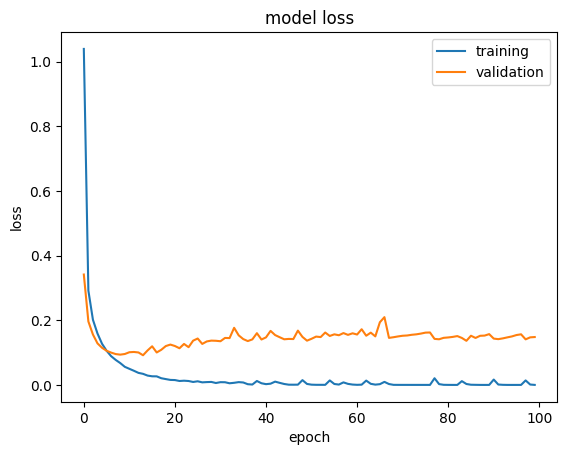

In [12]:
# loss vs epochs
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["training", "validation"], loc = "best")
plt.show();